## AFL 2 : Corona Virus Dataset


### Import Library

Import the necessary libraries

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Coronavirus Dataset**. In this dataset there will be 10 features including: <br>
- Country: Name of the country.
- Other names: Alternative or additional names for the country.
- ISO 3166-1 alpha-3 CODE: Three-letter country code as per ISO standards.
- Population: Total population of the country.
- Continent: The continent where the country is located.
- Total Cases: Total reported Covid-19 cases in the country.
- Total Deaths: Total reported deaths due to Covid-19.
- Tot Cases/1M pop: Total cases per 1 million people.
- Tot Deaths/1M pop: Total deaths per 1 million people.
- Death percentage: Percentage of deaths compared to total cases.

Load dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/COVID-19%20Coronavirus.csv')
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Drop unused columns
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [ ]:
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


2.

Drop 'Country', 'Other names', and 'ISO 3166-1 alpha-3 CODE' columns because all the values are different.

In [ ]:
df.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'], axis=1, inplace=True)
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


Rename 'Tot Cases//1M pop' and 'Tot Deaths/1M pop' for readability

In [ ]:
df.rename(columns={'Tot Cases//1M pop': 'Total Cases/1M pop', 'Tot Deaths/1M pop': 'Total Deaths/1M pop'}, inplace=True)
df.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


3. Perform label encoding

In [ ]:
encoder = LabelEncoder()
df['Continent'] = encoder.fit_transform(df['Continent'])
df.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


check the data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           225 non-null    int64  
 1   Continent            225 non-null    int64  
 2   Total Cases          225 non-null    int64  
 3   Total Deaths         225 non-null    int64  
 4   Total Cases/1M pop   225 non-null    int64  
 5   Total Deaths/1M pop  225 non-null    int64  
 6   Death percentage     225 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 12.4 KB


## Visualzation

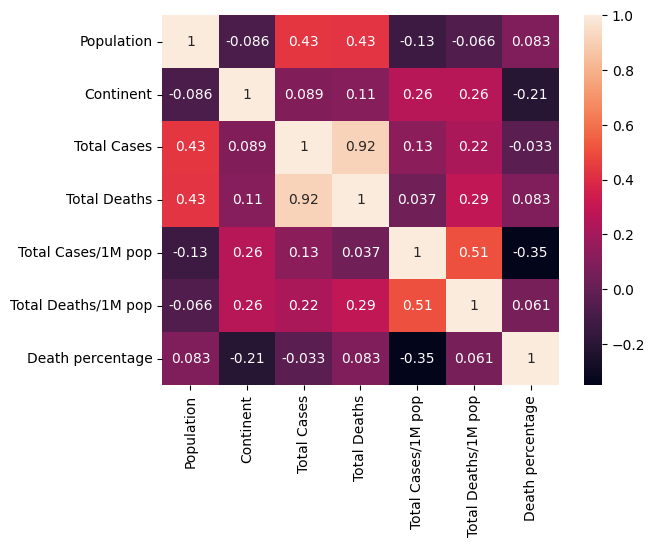

In [ ]:
# make a heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

4.

In [ ]:
# scaling data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='random',max_iter=300)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

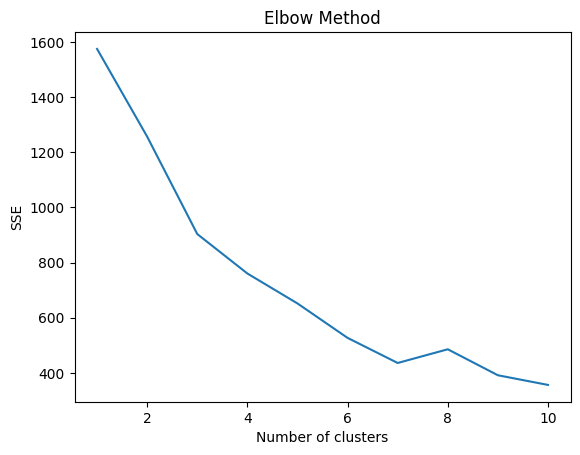

In [ ]:
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Train the K-Means model on the dataset with the number of clusters you have determined.

In [ ]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

The best k for your model is: 4


In [ ]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(scaled_df)

In [ ]:
# Inverse transform the scaled data to get the original values
inversed_df = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=scaled_df.columns)
inversed_df['KMeans'] = kmeans.labels_
inversed_df.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,KMeans
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.313743,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.275058,3
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.587216,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.382271,1
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.915438,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [ ]:
# aggregation
cluster_summary = inversed_df.groupby(y_pred).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [pd.Series.mode],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Total Cases/1M pop': ['mean', 'min', 'max'],
    'Total Deaths/1M pop': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max'],
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

# Tambahkan label "Cluster " di depan setiap kolom
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")
# Tampilkan hasil
cluster_summary_transposed

KMeans                          Cluster 0        Cluster 1         Cluster 2  \
Population          mean  48236018.870968  16728442.816901  651119826.333333   
                    min            6109.0           9930.0       215204501.0   
                    max      1439323776.0      146044010.0      1403754381.0   
Continent           mode              0.0              2.0   [1.0, 3.0, 4.0]   
Total Cases         mean    757415.043011   3452822.760563   51622637.333333   
                    min               2.0           4150.0        29999816.0   
                    max         9818328.0       25997852.0        81839052.0   
Total Deaths        mean     10291.107527     39560.169014     729959.666667   
                    min               0.0              6.0          521388.0   
                    max          155288.0         369708.0         1008222.0   
Total Cases/1M pop  mean     31716.924731    300627.760563     138262.666667   
                    min              16.0          43147.0           30653.0   
                    max          187113.0         696044.0          244734.0   
Total Deaths/1M pop mean       330.021505      2246.056338       2151.333333   
                    min               0.0            293.0             371.0   
                    max            2353.0           6286.0            3068.0   
Death percentage    mean         1.970174          1.06769          1.548193   
                    min               0.0         0.055546          1.211712   
                    max         18.151787         5.983499           2.20091   

KMeans                         Cluster 3  
Population          mean  4559362.051724  
                    min            805.0  
                    max       38321435.0  
Continent           mode             3.0  
Total Cases         mean   364101.724138  
                    min              1.0  
                    max        4680816.0  
Total Deaths        mean     3794.913793  
                    min              0.0  
                    max          37690.0  
Total Cases/1M pop  mean   105061.224138  
                    min              9.0  
                    max         340703.0  
Total Deaths/1M pop mean      864.568966  
                    min              0.0  
                    max           2669.0  
Death percentage    mean        1.056058  
                    min              0.0  
                    max         4.119248

In [ ]:
# count data from each cluster
inversed_df['KMeans'].value_counts().sort_index()

,count
KMeans,
0,93
1,71
2,3
3,58


In [ ]:
# write down your interpretation from the cluster that you have been made
# Cluster 0 includes countries with large populations but low impacts;
# Cluster 1 represents countries with high cases per million but low death rates;
# Cluster 2 highlights severely impacted, densely populated countries;
# Cluster 3 captures smaller countries with high case rates but very low mortality percentages.
# Each cluster reflects different challenges and opportunities for pandemic management.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

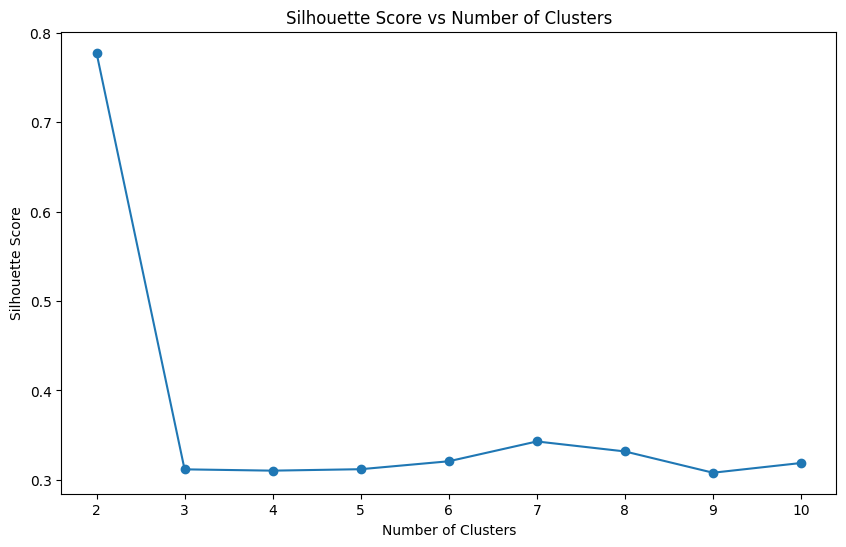

In [ ]:
# Silhouette Score graphic

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [ ]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(scaled_df)

In [ ]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
inversed_df['Agglo'] = y_hc
# show the df
inversed_df.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,KMeans,Agglo
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.313743,0,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.275058,3,0
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.587216,0,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.382271,1,0
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.915438,0,0


In [ ]:
cluster_summary = inversed_df.groupby(y_hc).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [pd.Series.mode],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Total Cases/1M pop': ['mean', 'min', 'max'],
    'Total Deaths/1M pop': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max'],
})

cluster_summary = cluster_summary.rename_axis("Agglo")

cluster_summary_transposed = cluster_summary.T

# Tambahkan label "Cluster " di depan setiap kolom
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="Agglo")
# Tampilkan hasil
cluster_summary_transposed

Agglo                        Cluster 0     Cluster 1
Population          mean  2.123420e+07  1.059160e+09
                    min   8.050000e+02  3.344006e+08
                    max   2.785865e+08  1.439324e+09
Continent           mode  2.220446e-16  1.000000e+00
Total Cases         mean  1.651140e+06  4.167428e+07
                    min   1.000000e+00  1.547380e+05
                    max   2.999982e+07  8.183905e+07
Total Deaths        mean  2.090802e+04  5.114160e+05
                    min   0.000000e+00  4.638000e+03
                    max   6.602690e+05  1.008222e+06
Total Cases/1M pop  mean  1.375094e+05  9.183167e+04
                    min   9.000000e+00  1.080000e+02
                    max   6.960440e+05  2.447340e+05
Total Deaths/1M pop mean  1.096270e+03  1.129667e+03
                    min   0.000000e+00  3.000000e+00
                    max   6.286000e+03  3.015000e+03
Death percentage    mean  1.439131e+00  1.813664e+00
                    min   0.000000e+00  1.211712e+00
                    max   1.815179e+01  2.997325e+00

Display the cluster summary in the form of a dataframe.

In [ ]:
inversed_df['Agglo'].value_counts().sort_index()

,count
Agglo,
0,222
1,3


In [ ]:
# write down your interpretation from the cluster that you have been made
# Cluster 0 captures countries with smaller populations and moderate case rates, where the pandemic's mortality impact has been relatively low.
# Cluster 1 represents highly populated countries with significantly higher infection rates, mortality numbers, and death percentages, reflecting a more severe overall impact.

**Hierarchical Visualization**

Single Linkage

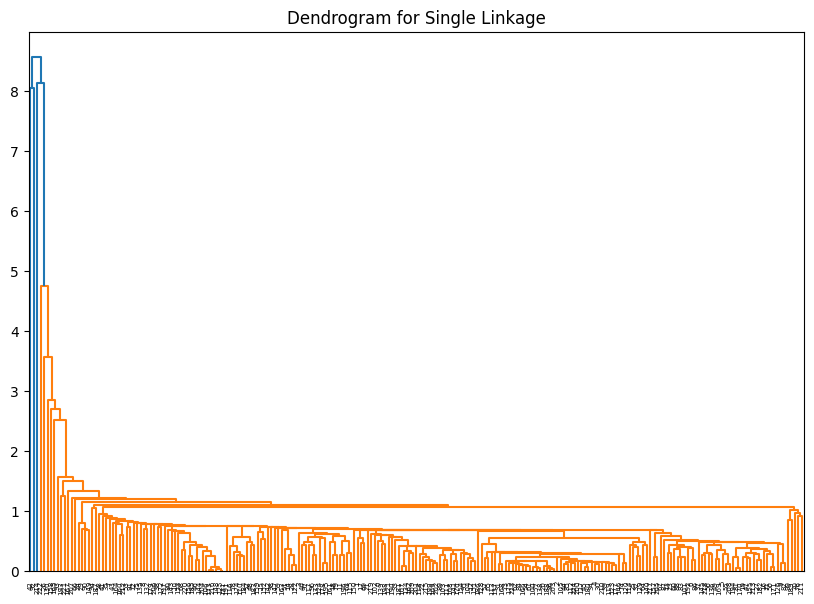

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(scaled_df, method='single'))
plt.show()

complete linkage

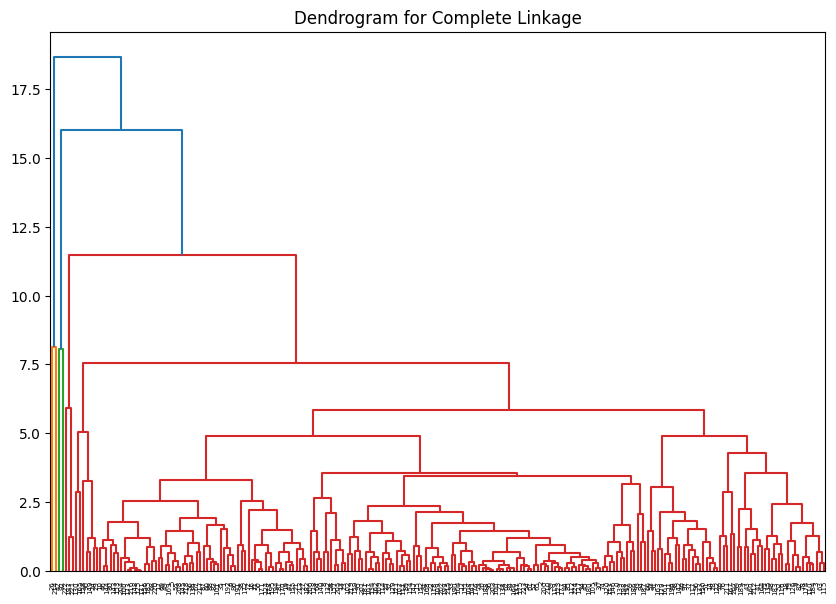

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(scaled_df, method='complete'))
plt.show()


average linkage

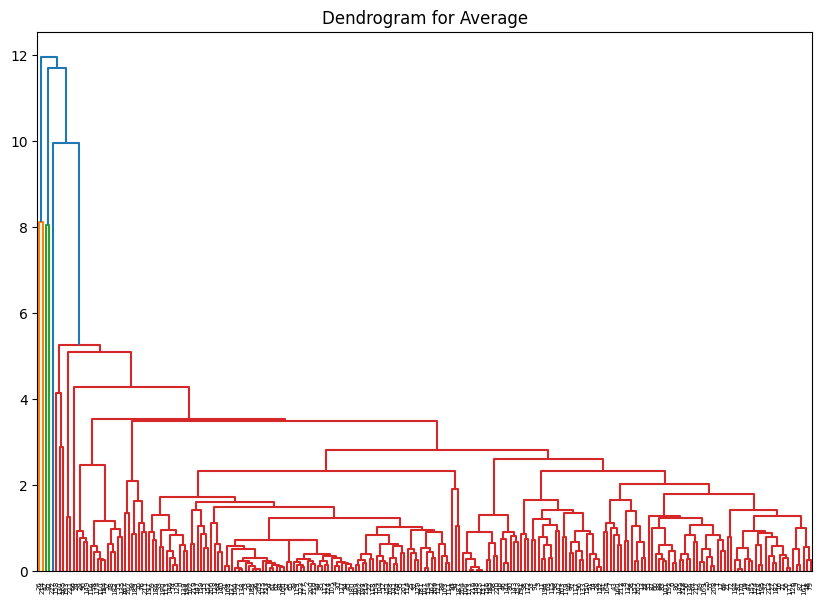

In [ ]:

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Average")
dend = sch.dendrogram(sch.linkage(scaled_df, method='average'))
plt.show()

ward method

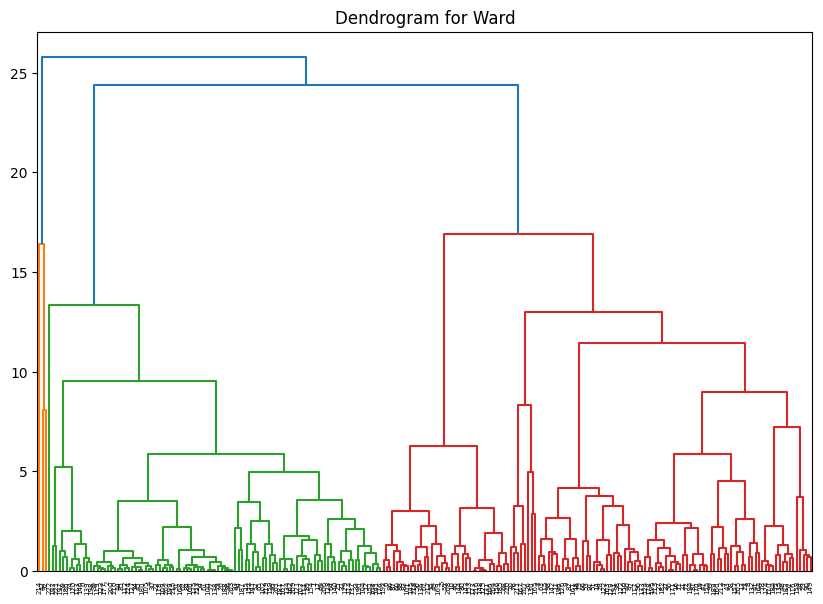

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Ward")
dend = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.show()